<div class="alert alert-block alert-info">

## <center> <b> Stock Sentiment </center>
## <center> Predicting market behavior from tweets </center> <br>
##  <center> <b> CLASSIFIER PIPELINE </center> <br>
## <center> Spring Semester 2024-2025 <center>

<center> Group 35: <center>
<center>Joana Esteves, 20240746 <br><center>
<center>José Cavaco, 20240513 <br><center>
<center> Leonardo Di Caterina 20240485<br><center>
<center>Matilde Miguel, 20240549 <br><center>
<center>Rita Serra, 20240515 <br><center>

<div>

In [1]:
# Cell 1: Data Loading and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import time
import warnings
warnings.filterwarnings('ignore')

# Load data
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data')
data_train = pd.read_csv(os.path.join(data_folder, 'train.csv'))
print(f"Dataset shape: {data_train.shape}")
print(f"Label distribution:\n{data_train['label'].value_counts()}")
data_train.head()

Dataset shape: (9543, 2)
Label distribution:
label
2    6178
1    1923
0    1442
Name: count, dtype: int64


,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [ ]:
# Cell 2: Setup and Import Classification Module
print("Current working directory:", os.getcwd())
os.chdir(os.path.dirname(os.getcwd()))
print("Changed working directory to:", os.getcwd())

from src.classification import SklearnSentimentClassifier, KerasSentimentClassifier
from src.embedding import TextEmbedder
from src.preprocessing import Preprocessing
from imblearn.combine import SMOTETomek

print("Modules imported successfully")

Current working directory: /Users/leonardodicaterina/Desktop/NovaIMS/TextMining/TM_Project/Notebooks
Changed working directory to: /Users/leonardodicaterina/Desktop/NovaIMS/TextMining/TM_Project
Modules imported successfully


In [ ]:
# Cell 3: Data Preparation
# Use a larger subset for classification testing
subset_size = 2000
sample_data = data_train.sample(n=subset_size, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    sample_data['text'], sample_data['label'], 
    test_size=0.2, stratify=sample_data['label'], random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training label distribution:\n{pd.Series(y_train).value_counts()}")

Training set size: 1600
Test set size: 400
Training label distribution:
label
2    1031
1     330
0     239
Name: count, dtype: int64


In [ ]:
# Cell 4: Generate Embeddings for Classification
# We'll use the best performing embedding from your previous analysis
print("Generating embeddings...")

# Use SentenceTransformer for high-quality embeddings

preprocesser = Preprocessing(lemmatize=True,stem=True)
X_train_prep = preprocesser.preprocess(X_train.tolist())
X_test_prep = preprocesser.preprocess(X_test.tolist())

embedder = TextEmbedder(method='word2vec')
embedder.fit(X_train.tolist())

X_train_embeddings = embedder.transform(X_train.tolist())
X_test_embeddings = embedder.transform(X_test.tolist())

print(f"Embedding shape: {X_train_embeddings.shape}")
print(f"Embedding dimension: {X_train_embeddings.shape[1]}")

Generating embeddings...
Embedding shape: (1600, 100)
Embedding dimension: 100


In [ ]:
# Cell 5: Balance Dataset (Optional)
# Apply SMOTE-Tomek for better class balance
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_embeddings, y_train)

print(f"Original training set size: {len(X_train_embeddings)}")
print(f"Balanced training set size: {len(X_train_balanced)}")
print(f"Balanced label distribution:\n{pd.Series(y_train_balanced).value_counts()}")

Original training set size: 1600
Balanced training set size: 3091
Balanced label distribution:
label
0    1031
2    1030
1    1030
Name: count, dtype: int64


In [ ]:
# Cell 6: Classifier Configurations
# Define comprehensive classifier configurations
sklearn_configs ={
        'name': 'SVM (Linear)',
        'model_type': 'svm',
        'params': {'C': 1.0, 'kernel': 'linear'}
    }

 Testing Sklearn Classifiers...
Sklearn svm model trained successfully.
Evaluating Sklearn Classifier...
Confusion Matrix:


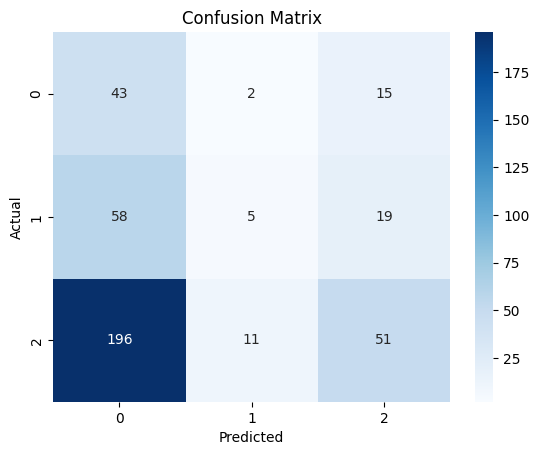

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.72      0.24        60
           1       0.28      0.06      0.10        82
           2       0.60      0.20      0.30       258

    accuracy                           0.25       400
   macro avg       0.34      0.33      0.21       400
weighted avg       0.47      0.25      0.25       400



In [ ]:
print(" Testing Sklearn Classifiers...")
print("=" * 50)

# Only pass model_type and params, not the whole config dict
classifier = SklearnSentimentClassifier(
	model_type=sklearn_configs[0]['model_type'],
	**sklearn_configs[0]['params']
)
model = classifier.train(X_train_balanced, y_train_balanced)

print("Evaluating Sklearn Classifier...")
y_pred = classifier.predict(X_test_embeddings)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(x) for x in np.unique(y_test)]))

        

 Debugging DataFrame structures:

Sklearn DataFrame columns: ['Method', 'Model Type', 'Accuracy', 'CV Mean', 'CV Std', 'Train Time (s)', 'Predict Time (s)', 'Total Time (s)', 'Predictions/sec', 'Error']
Sklearn DataFrame shape: (5, 10)

Keras DataFrame columns: ['Method', 'Hidden Layers', 'Accuracy', 'Test Loss', 'Train Time (s)', 'Predict Time (s)', 'Total Time (s)', 'Epochs Trained', 'Parameters']
Keras DataFrame shape: (3, 9)

 Sklearn DataFrame preview:
                Method           Model Type  Accuracy   CV Mean    CV Std  \
0  Logistic Regression  logistic_regression    0.2500  0.381742  0.021170   
1        Random Forest        random_forest    0.5925  0.833068  0.018473   
2            SVM (RBF)                  svm    0.2750  0.386600  0.016495   
3         SVM (Linear)                  svm    0.2475  0.362980  0.016513   
4          Naive Bayes                  NaN       NaN       NaN       NaN   

   Train Time (s)  Predict Time (s)  Total Time (s)  Predictions/sec  \
0  

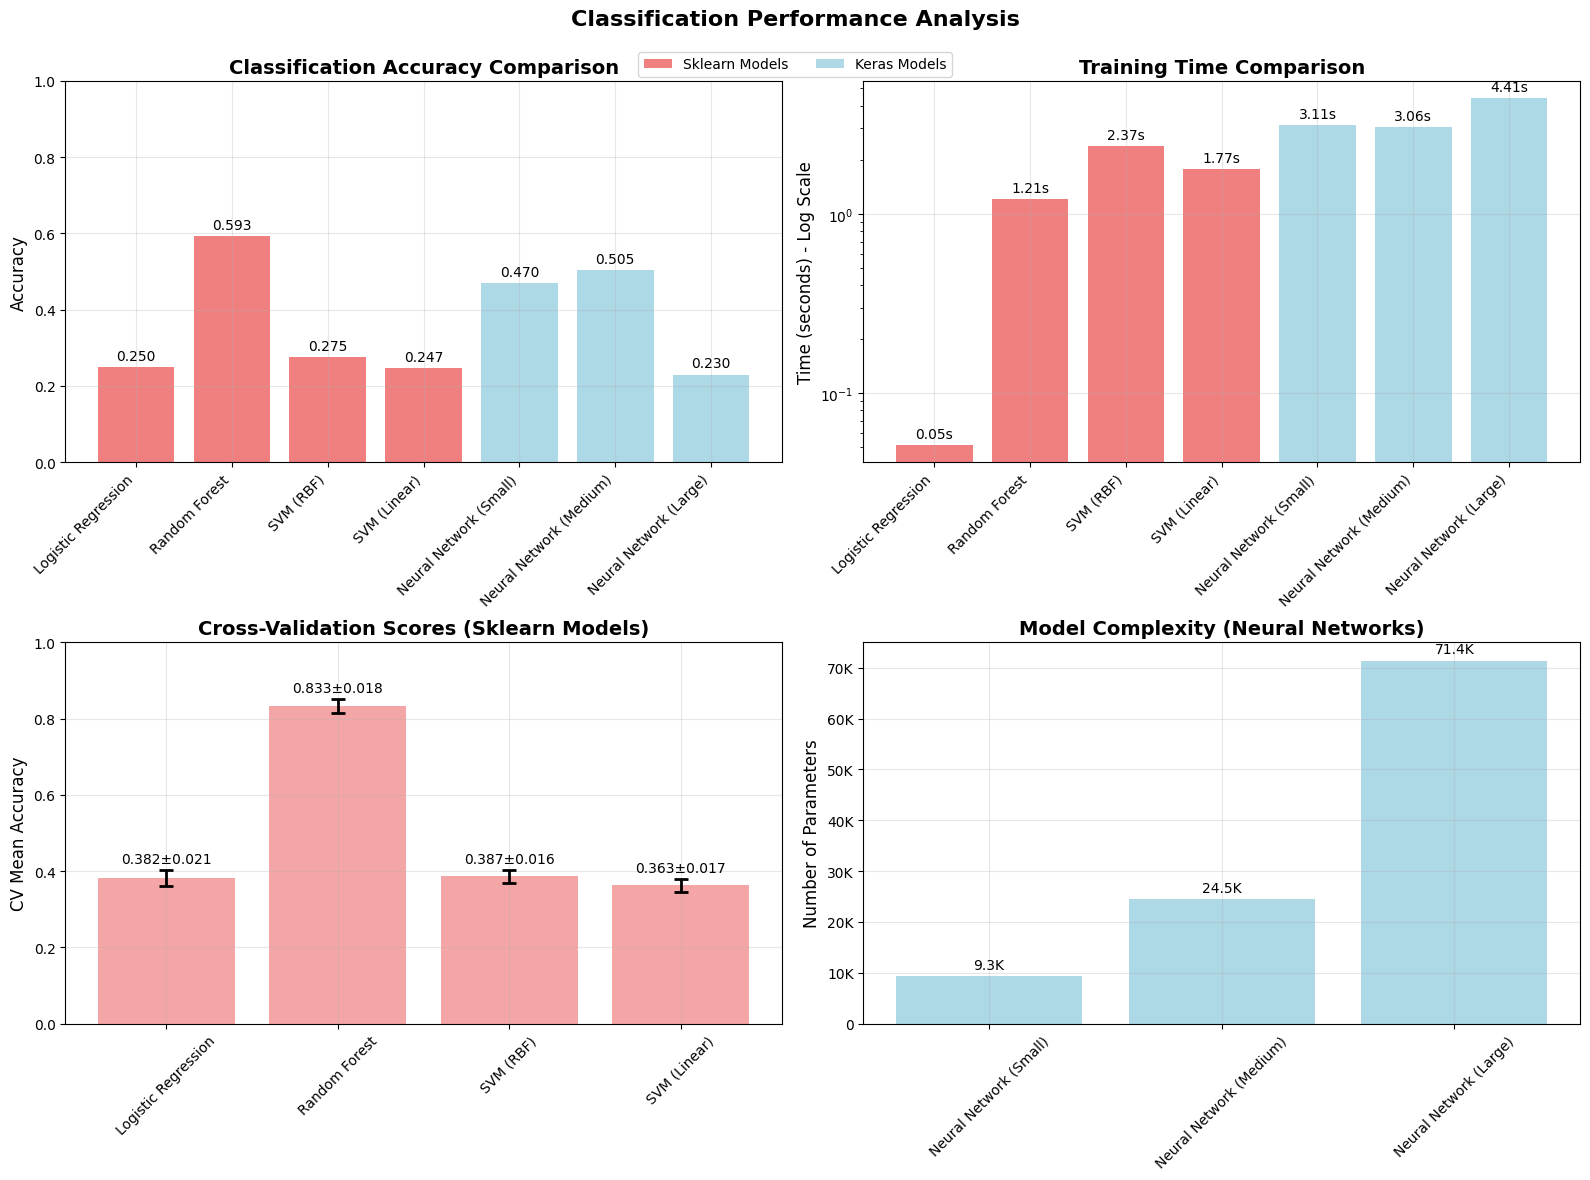


 VISUALIZATION INSIGHTS:
 Best Accuracy: Random Forest (0.5925)
 Fastest Training: Logistic Regression (0.05s)
 Average Accuracy: 0.3671
  Average Training Time: 2.28s
 Sklearn Average: 0.3413
 Keras Average: 0.4017


In [ ]:
# Enhanced Cell 9: Performance Visualization with Additional Metrics (Fixed)

# Debug: Check DataFrame structures
print(" Debugging DataFrame structures:")
print("\nSklearn DataFrame columns:", sklearn_df.columns.tolist())
print("Sklearn DataFrame shape:", sklearn_df.shape)
print("\nKeras DataFrame columns:", keras_df.columns.tolist())
print("Keras DataFrame shape:", keras_df.shape)

# Show first few rows to understand the structure
print("\n Sklearn DataFrame preview:")
print(sklearn_df.head())
print("\n Keras DataFrame preview:")
print(keras_df.head())

# Combine successful results for comparison with proper error handling
successful_sklearn = sklearn_df.dropna(subset=['Accuracy']) if 'Accuracy' in sklearn_df.columns else pd.DataFrame()
successful_keras = keras_df.dropna(subset=['Accuracy']) if 'Accuracy' in keras_df.columns else pd.DataFrame()

print(f"\n Successful models found:")
print(f"   • Sklearn models: {len(successful_sklearn)}")
print(f"   • Keras models: {len(successful_keras)}")

if len(successful_sklearn) > 0 or len(successful_keras) > 0:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Accuracy comparison with value labels
    all_methods = []
    all_accuracies = []
    all_colors = []
    
    if len(successful_sklearn) > 0:
        all_methods.extend(successful_sklearn['Method'])
        all_accuracies.extend(successful_sklearn['Accuracy'])
        all_colors.extend(['lightcoral'] * len(successful_sklearn))
    
    if len(successful_keras) > 0:
        all_methods.extend(successful_keras['Method'])
        all_accuracies.extend(successful_keras['Accuracy'])
        all_colors.extend(['lightblue'] * len(successful_keras))
    
    if len(all_methods) > 0:
        bars1 = ax1.bar(range(len(all_methods)), all_accuracies, color=all_colors)
        ax1.set_title('Classification Accuracy Comparison', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Accuracy', fontsize=12)
        ax1.set_xticks(range(len(all_methods)))
        ax1.set_xticklabels(all_methods, rotation=45, ha='right')
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, 1.0)
        
        # Add value labels on bars
        for bar, acc in zip(bars1, all_accuracies):
            height = bar.get_height()
            ax1.annotate(f'{acc:.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    else:
        ax1.text(0.5, 0.5, 'No Models\nAvailable', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=14)
        ax1.set_title('Classification Accuracy Comparison', fontsize=14, fontweight='bold')
    
    # Training time comparison with log scale if needed
    all_train_times = []
    if len(successful_sklearn) > 0 and 'Train Time (s)' in successful_sklearn.columns:
        all_train_times.extend(successful_sklearn['Train Time (s)'])
    if len(successful_keras) > 0 and 'Train Time (s)' in successful_keras.columns:
        all_train_times.extend(successful_keras['Train Time (s)'])
    
    if len(all_train_times) > 0:
        bars2 = ax2.bar(range(len(all_methods)), all_train_times, color=all_colors)
        ax2.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Time (seconds)', fontsize=12)
        ax2.set_xticks(range(len(all_methods)))
        ax2.set_xticklabels(all_methods, rotation=45, ha='right')
        ax2.grid(True, alpha=0.3)
        
        # Use log scale if there's a large difference in training times
        time_ratio = max(all_train_times) / min(all_train_times) if min(all_train_times) > 0 else 1
        if time_ratio > 10:
            ax2.set_yscale('log')
            ax2.set_ylabel('Time (seconds) - Log Scale', fontsize=12)
        
        # Add value labels on bars
        for bar, time_val in zip(bars2, all_train_times):
            height = bar.get_height()
            ax2.annotate(f'{time_val:.2f}s',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    else:
        ax2.text(0.5, 0.5, 'No Training Time\nData Available', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=14)
        ax2.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
    
    # Cross-validation scores (Sklearn only) with enhanced styling
    if len(successful_sklearn) > 0 and 'CV Mean' in successful_sklearn.columns:
        bars3 = ax3.bar(successful_sklearn['Method'], successful_sklearn['CV Mean'], 
                       yerr=successful_sklearn['CV Std'] if 'CV Std' in successful_sklearn.columns else None, 
                       color='lightcoral', alpha=0.7, 
                       capsize=5, error_kw={'linewidth': 2, 'markeredgewidth': 2})
        ax3.set_title('Cross-Validation Scores (Sklearn Models)', fontsize=14, fontweight='bold')
        ax3.set_ylabel('CV Mean Accuracy', fontsize=12)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(0, 1.0)
        
        # Add value labels
        if 'CV Std' in successful_sklearn.columns:
            for i, (mean_val, std_val) in enumerate(zip(successful_sklearn['CV Mean'], successful_sklearn['CV Std'])):
                ax3.annotate(f'{mean_val:.3f}±{std_val:.3f}',
                            xy=(i, mean_val + std_val),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)
        else:
            for i, mean_val in enumerate(successful_sklearn['CV Mean']):
                ax3.annotate(f'{mean_val:.3f}',
                            xy=(i, mean_val),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)
    else:
        ax3.text(0.5, 0.5, 'No Sklearn Models\nAvailable', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=14)
        ax3.set_title('Cross-Validation Scores (Sklearn Models)', fontsize=14, fontweight='bold')
    
    # Model complexity (Parameters for Keras) with better formatting
    if len(successful_keras) > 0 and 'Parameters' in successful_keras.columns:
        bars4 = ax4.bar(successful_keras['Method'], successful_keras['Parameters'], color='lightblue')
        ax4.set_title('Model Complexity (Neural Networks)', fontsize=14, fontweight='bold')
        ax4.set_ylabel('Number of Parameters', fontsize=12)
        ax4.tick_params(axis='x', rotation=45)
        ax4.grid(True, alpha=0.3)
        
        # Format y-axis for better readability
        ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x >= 1000 else f'{int(x)}'))
        
        # Add value labels
        for bar, param_count in zip(bars4, successful_keras['Parameters']):
            height = bar.get_height()
            label = f'{param_count/1000:.1f}K' if param_count >= 1000 else f'{param_count}'
            ax4.annotate(label,
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)
    else:
        ax4.text(0.5, 0.5, 'No Keras Models\nAvailable', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=14)
        ax4.set_title('Model Complexity (Neural Networks)', fontsize=14, fontweight='bold')
    
    # Add legend to distinguish model types
    if len(successful_sklearn) > 0 and len(successful_keras) > 0:
        legend_elements = [
            plt.Rectangle((0,0),1,1, facecolor='lightcoral', label='Sklearn Models'),
            plt.Rectangle((0,0),1,1, facecolor='lightblue', label='Keras Models')
        ]
        fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
    
    plt.suptitle('Classification Performance Analysis', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()
    
    # Print summary statistics
    print("\n VISUALIZATION INSIGHTS:")
    print("=" * 40)
    
    if len(all_accuracies) > 0:
        best_acc_idx = np.argmax(all_accuracies)
        fastest_idx = np.argmin(all_train_times) if len(all_train_times) > 0 else 0
        
        print(f" Best Accuracy: {all_methods[best_acc_idx]} ({all_accuracies[best_acc_idx]:.4f})")
        if len(all_train_times) > 0:
            print(f" Fastest Training: {all_methods[fastest_idx]} ({all_train_times[fastest_idx]:.2f}s)")
        print(f" Average Accuracy: {np.mean(all_accuracies):.4f}")
        if len(all_train_times) > 0:
            print(f"  Average Training Time: {np.mean(all_train_times):.2f}s")
        
        if len(successful_sklearn) > 0:
            sklearn_avg = successful_sklearn['Accuracy'].mean()
            print(f" Sklearn Average: {sklearn_avg:.4f}")
        
        if len(successful_keras) > 0:
            keras_avg = successful_keras['Accuracy'].mean()
            print(f" Keras Average: {keras_avg:.4f}")
    else:
        print("  No accuracy data available to analyze")

else:
    print(" No successful models to visualize")
    print("Please check your model configurations and training process")
    
    # Additional debugging information
    print("\n🔍 Debugging Information:")
    if len(sklearn_df) > 0:
        print("Sklearn DataFrame contains:")
        for col in sklearn_df.columns:
            non_null_count = sklearn_df[col].count()
            print(f"  • {col}: {non_null_count} non-null values")
    
    if len(keras_df) > 0:
        print("Keras DataFrame contains:")
        for col in keras_df.columns:
            non_null_count = keras_df[col].count()
            print(f"  • {col}: {non_null_count} non-null values")
    
    # Check for error messages
    if 'Error' in sklearn_df.columns:
        errors = sklearn_df['Error'].dropna()
        if len(errors) > 0:
            print("\nSklearn Errors:")
            for idx, error in errors.items():
                print(f"  • Row {idx}: {error}")
    
    if 'Error' in keras_df.columns:
        errors = keras_df['Error'].dropna()
        if len(errors) > 0:
            print("\nKeras Errors:")
            for idx, error in errors.items():
                print(f"  • Row {idx}: {error}")

In [ ]:
def plot_confusion_matrices(models_dict, model_type="Sklearn"):
    """Plot confusion matrices for all models"""
    n_models = len(models_dict)
    if n_models == 0:
        return
    
    cols = min(3, n_models)
    rows = (n_models + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    
    # Fix axis handling for consistent indexing
    if n_models == 1:
        axes = [[axes]]  # Wrap in nested list for consistent [row][col] access
    elif rows == 1:
        axes = [axes]    # Wrap single row in list
    elif cols == 1:
        axes = [[ax] for ax in axes]  # Wrap single column
    
    for idx, (name, model_data) in enumerate(models_dict.items()):
        row, col = idx // cols, idx % cols
        ax = axes[row][col]  # Consistent access pattern
        
        # Get true labels and predictions
        y_true = y_test_encoded if 'sklearn' in model_type.lower() else y_test_encoded
        y_pred = model_data['predictions']
        
        # Create confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        
        # Plot
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'{name}\nAccuracy: {model_data["results"]["accuracy"]:.3f}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    # Hide empty subplots
    for idx in range(n_models, rows * cols):
        row, col = idx // cols, idx % cols
        ax = axes[row][col]
        ax.set_visible(False)
    
    plt.suptitle(f'{model_type} Models - Confusion Matrices', fontsize=16)
    plt.tight_layout()
    plt.show()

 Feature Importance Analysis


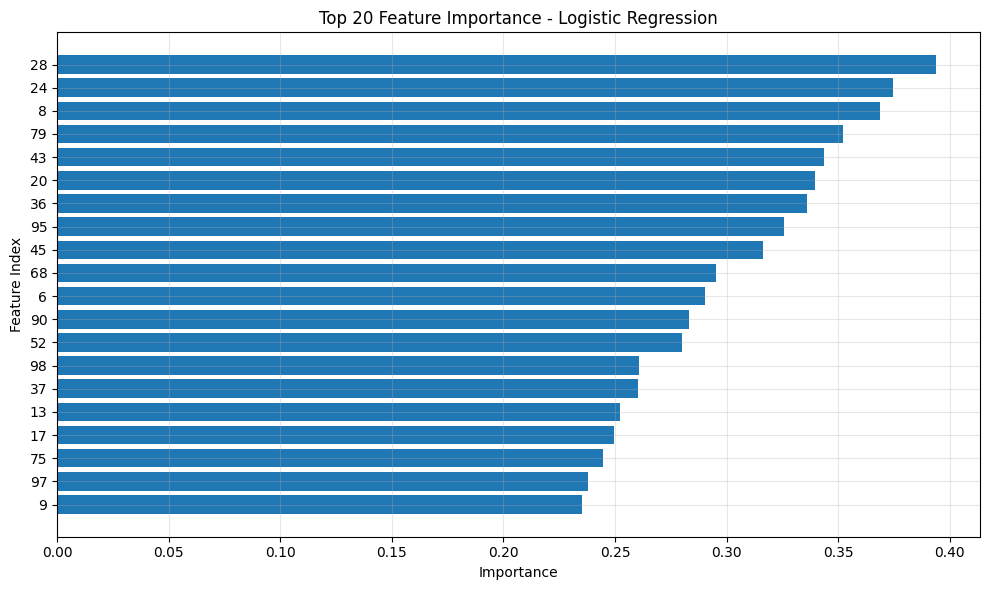


Logistic Regression:
  Max importance: 0.393811
  Mean importance: 0.154636
  Std importance: 0.091069


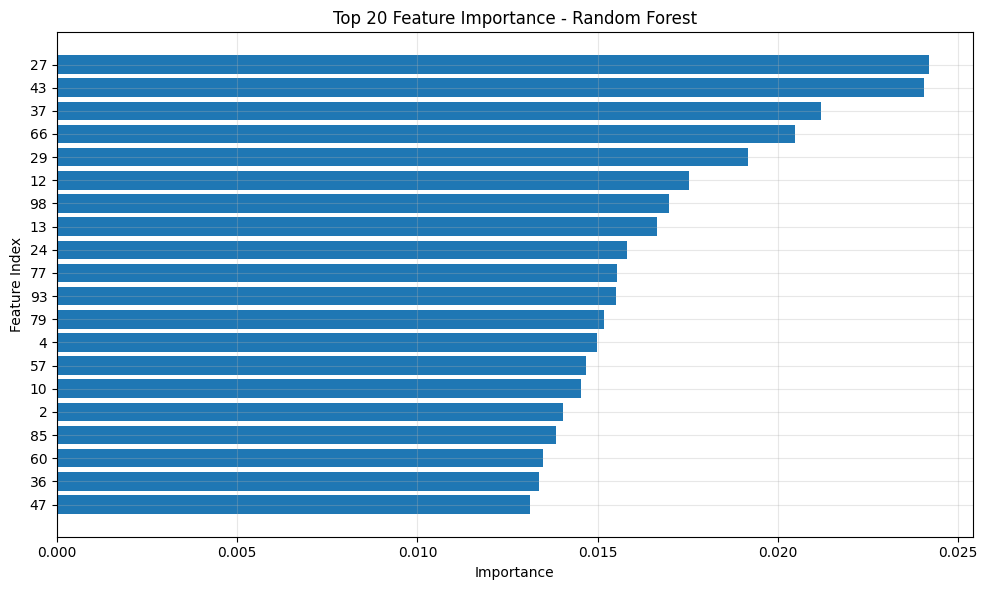


Random Forest:
  Max importance: 0.024200
  Mean importance: 0.010000
  Std importance: 0.004118

SVM (RBF): Model svm does not support feature importance.


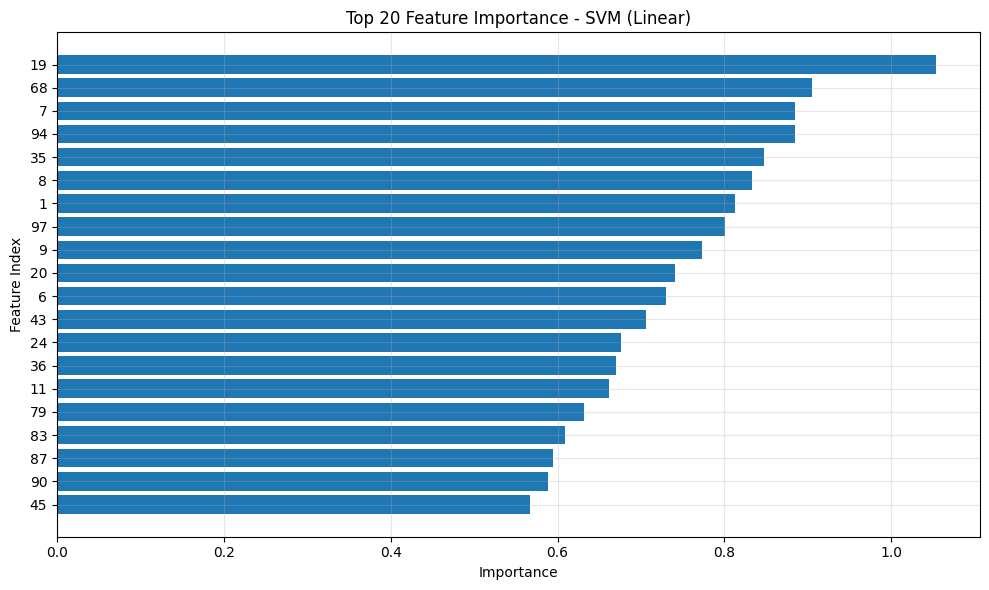


SVM (Linear):
  Max importance: 1.053826
  Mean importance: 0.380965
  Std importance: 0.232489


In [ ]:
# Cell 11: Feature Importance Analysis (Sklearn Models)
def analyze_feature_importance(sklearn_models):
    """Analyze feature importance for models that support it"""
    print(" Feature Importance Analysis")
    print("=" * 40)
    
    for name, model_data in sklearn_models.items():
        classifier = model_data['classifier']
        
        try:
            importance = classifier.get_feature_importance()
            
            # Get top 20 most important features
            top_indices = np.argsort(importance)[-20:]
            top_importance = importance[top_indices]
            
            plt.figure(figsize=(10, 6))
            plt.barh(range(len(top_importance)), top_importance)
            plt.title(f'Top 20 Feature Importance - {name}')
            plt.xlabel('Importance')
            plt.ylabel('Feature Index')
            plt.yticks(range(len(top_importance)), top_indices)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            print(f"\n{name}:")
            print(f"  Max importance: {np.max(importance):.6f}")
            print(f"  Mean importance: {np.mean(importance):.6f}")
            print(f"  Std importance: {np.std(importance):.6f}")
            
        except ValueError as e:
            print(f"\n{name}: {e}")

if len(sklearn_models) > 0:
    analyze_feature_importance(sklearn_models)

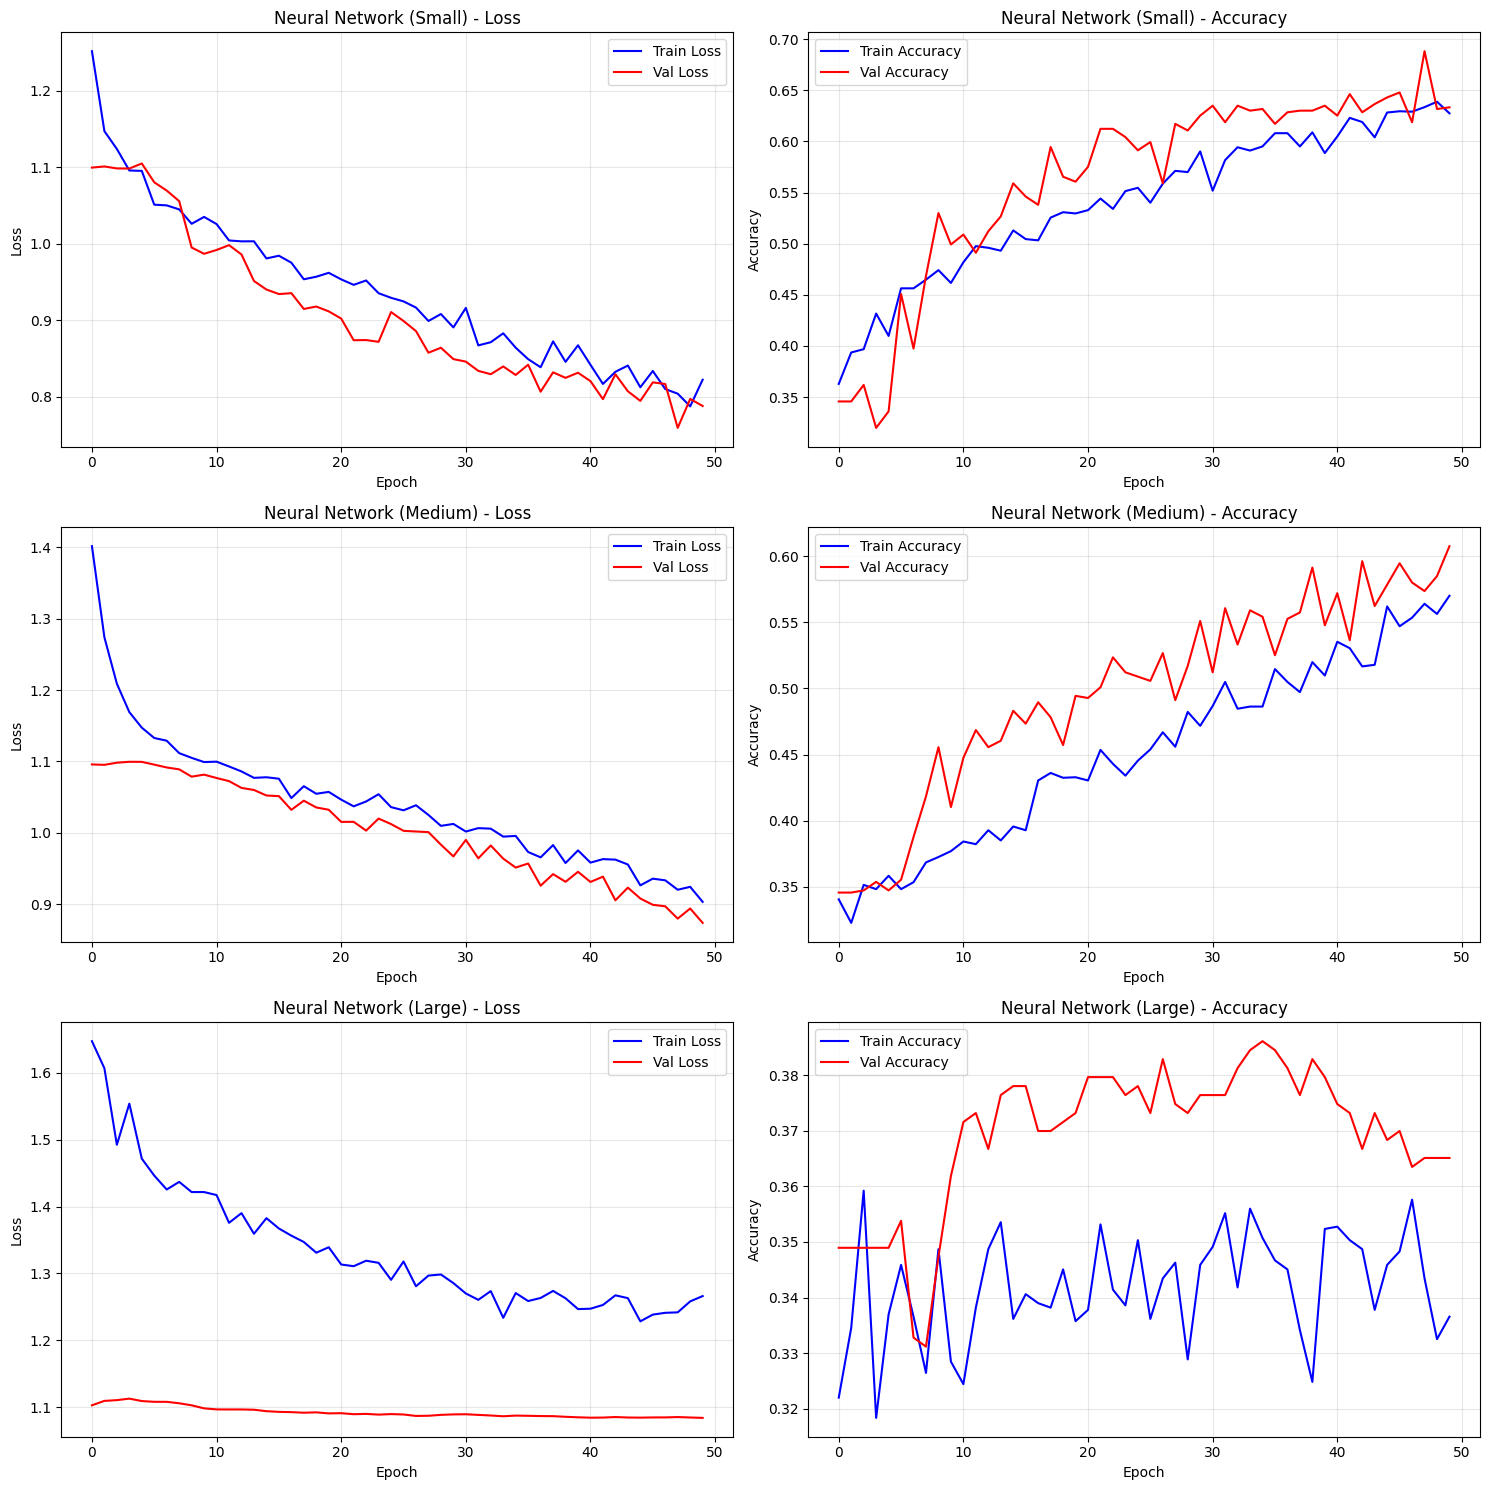

In [ ]:
# Cell 12: Neural Network Training History Analysis
def plot_training_histories(keras_models):
    """Plot training histories for neural networks"""
    if len(keras_models) == 0:
        return
    
    fig, axes = plt.subplots(len(keras_models), 2, figsize=(15, 5*len(keras_models)))
    if len(keras_models) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (name, model_data) in enumerate(keras_models.items()):
        history = model_data['history']
        
        # Plot loss
        axes[idx, 0].plot(history.history['loss'], label='Train Loss', color='blue')
        if 'val_loss' in history.history:
            axes[idx, 0].plot(history.history['val_loss'], label='Val Loss', color='red')
        axes[idx, 0].set_title(f'{name} - Loss')
        axes[idx, 0].set_xlabel('Epoch')
        axes[idx, 0].set_ylabel('Loss')
        axes[idx, 0].legend()
        axes[idx, 0].grid(True, alpha=0.3)
        
        # Plot accuracy
        axes[idx, 1].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
        if 'val_accuracy' in history.history:
            axes[idx, 1].plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
        axes[idx, 1].set_title(f'{name} - Accuracy')
        axes[idx, 1].set_xlabel('Epoch')
        axes[idx, 1].set_ylabel('Accuracy')
        axes[idx, 1].legend()
        axes[idx, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

if len(keras_models) > 0:
    plot_training_histories(keras_models)

In [ ]:
# Cell 13: Model Information and Capabilities Analysis
def analyze_model_capabilities():
    """Analyze and display model capabilities"""
    print("🔧 Model Capabilities Analysis")
    print("=" * 50)
    
    # Sklearn capabilities
    print("\n Sklearn Models:")
    for name, model_data in sklearn_models.items():
        classifier = model_data['classifier']
        info = classifier.get_model_info()
        
        print(f"\n{name}:")
        print(f"  Model Type: {info['model_type']}")
        print(f"  Supports Probability: {info['supports_probability']}")
        print(f"  Supports Feature Importance: {info['supports_feature_importance']}")
        print(f"  Number of Classes: {info['num_classes']}")
        if 'n_features' in info:
            print(f"  Number of Features: {info['n_features']}")
    
    # Keras capabilities
    print("\n Keras Models:")
    for name, model_data in keras_models.items():
        classifier = model_data['classifier']
        info = classifier.get_model_info()
        
        print(f"\n{name}:")
        print(f"  Hidden Layers: {info['hidden_layers']}")
        print(f"  Total Parameters: {info['total_parameters']:,}")
        print(f"  Dropout Rate: {info['dropout_rate']}")
        print(f"  Learning Rate: {info['learning_rate']}")
        print(f"  Training Epochs: {info.get('training_epochs', 'N/A')}")
        if 'final_val_accuracy' in info:
            print(f"  Final Val Accuracy: {info['final_val_accuracy']:.4f}")

if len(sklearn_models) > 0 or len(keras_models) > 0:
    analyze_model_capabilities()

🔧 Model Capabilities Analysis

 Sklearn Models:

Logistic Regression:
  Model Type: logistic_regression
  Supports Probability: True
  Supports Feature Importance: True
  Number of Classes: 3
  Number of Features: 100

Random Forest:
  Model Type: random_forest
  Supports Probability: True
  Supports Feature Importance: True
  Number of Classes: 3
  Number of Features: 100

SVM (RBF):
  Model Type: svm
  Supports Probability: True
  Supports Feature Importance: False
  Number of Classes: 3
  Number of Features: 100

SVM (Linear):
  Model Type: svm
  Supports Probability: True
  Supports Feature Importance: True
  Number of Classes: 3
  Number of Features: 100

 Keras Models:

Neural Network (Small):
  Hidden Layers: [64, 32]
  Total Parameters: 9,299
  Dropout Rate: 0.3
  Learning Rate: 0.001
  Training Epochs: 50
  Final Val Accuracy: 0.6333

Neural Network (Medium):
  Hidden Layers: [128, 64, 32]
  Total Parameters: 24,531
  Dropout Rate: 0.4
  Learning Rate: 0.001
  Training Epochs:

In [ ]:
# Cell 14: Summary and Recommendations
print("\n CLASSIFICATION ANALYSIS SUMMARY")
print("=" * 60)

# Find best performers
all_results = []
if len(successful_sklearn) > 0:
    for _, row in successful_sklearn.iterrows():
        all_results.append({
            'Method': row['Method'],
            'Type': 'Sklearn',
            'Accuracy': row['Accuracy'],
            'Train Time': row['Train Time (s)'],
            'CV Score': row.get('CV Mean', 0)
        })

if len(successful_keras) > 0:
    for _, row in successful_keras.iterrows():
        all_results.append({
            'Method': row['Method'],
            'Type': 'Keras',
            'Accuracy': row['Accuracy'],
            'Train Time': row['Train Time (s)'],
            'CV Score': 0  # Keras doesn't have CV in this analysis
        })

if all_results:
    results_df = pd.DataFrame(all_results)
    
    best_accuracy = results_df.loc[results_df['Accuracy'].idxmax()]
    fastest_training = results_df.loc[results_df['Train Time'].idxmin()]
    
    print(f"\n Performance Insights:")
    print(f"   • Best Accuracy: {best_accuracy['Method']} ({best_accuracy['Accuracy']:.4f})")
    print(f"   • Fastest Training: {fastest_training['Method']} ({fastest_training['Train Time']:.2f}s)")
    
    sklearn_count = len(successful_sklearn)
    keras_count = len(successful_keras)
    
    print(f"\n Model Statistics:")
    print(f"   • Successful Sklearn models: {sklearn_count}")
    print(f"   • Successful Keras models: {keras_count}")
    print(f"   • Dataset size: {subset_size} samples")
    print(f"   • Embedding dimension: {X_train_embeddings.shape[1]}")
    
    print(f"\n Key Insights:")
    if sklearn_count > 0:
        avg_sklearn_acc = successful_sklearn['Accuracy'].mean()
        print(f"   • Average Sklearn accuracy: {avg_sklearn_acc:.4f}")
    
    if keras_count > 0:
        avg_keras_acc = successful_keras['Accuracy'].mean()
        print(f"   • Average Keras accuracy: {avg_keras_acc:.4f}")
    
    print(f"\n Recommendations:")
    print(f"   • For speed: Use {fastest_training['Method']}")
    print(f"   • For accuracy: Use {best_accuracy['Method']}")

else:
    print("No successful models to analyze.")

print("\n" + "=" * 60)


 CLASSIFICATION ANALYSIS SUMMARY

 Performance Insights:
   • Best Accuracy: Random Forest (0.5925)
   • Fastest Training: Logistic Regression (0.05s)

 Model Statistics:
   • Successful Sklearn models: 4
   • Successful Keras models: 3
   • Dataset size: 2000 samples
   • Embedding dimension: 100

 Key Insights:
   • Average Sklearn accuracy: 0.3413
   • Average Keras accuracy: 0.4017

 Recommendations:
   • For speed: Use Logistic Regression
   • For accuracy: Use Random Forest

